

 1. **Predicting Customer Churn for a Subscription Service**


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
# Load dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Subscription_Service_Churn_Dataset.csv')

# Inspect the first few rows and summary statistics of the data
print(data.head())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Fill missing values (numerical columns with median and categorical columns with mode)
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical columns
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numerical columns
        data[column].fillna(data[column].median(), inplace=True)

# Perform one-hot encoding for categorical variables
data = pd.get_dummies(data)

# Identify the churn column (Assuming it has "Churn" in the name)
churn_column = [col for col in data.columns if 'Churn' in col]

# Check if the churn column exists
if not churn_column:
    print("Error: No churn column found. Check your dataset and one-hot encoding.")
else:
    # Assuming we have only one churn-related column
    churn_column = churn_column[0]

    # Separate features (X) and target (y)
    X = data.drop(churn_column, axis=1)  # Drop the churn column from features
    y = data[churn_column]  # The churn column as the target variable

# Show the final dataset shape
print(f'Features (X) shape: {X.shape}')
print(f'Target (y) shape: {y.shape}')



   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          42       11.321950    475.521914            Basic   
1          95       12.810915   1217.036887         Standard   
2           6             NaN     91.583304         Standard   
3          54       17.917819    967.562224            Basic   
4          27             NaN    339.057244            Basic   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0  Electronic check              Yes      Movies               Yes   
1  Electronic check              Yes    TV Shows                No   
2       Credit card              Yes    TV Shows                No   
3               NaN              Yes      Movies                No   
4      Mailed check               No    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Tablet             0.386852  ...                        25   
1           Mobile            37.123000  ...  

<ipython-input-16-ff05f8055da2>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
<ipython-input-16-ff05f8055da2>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[231   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       231
           1       0.00      0.00      0.00        58

    accuracy                           0.80       289
   macro avg       0.40      0.50      0.44       289
weighted avg       0.64      0.80      0.71       289



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


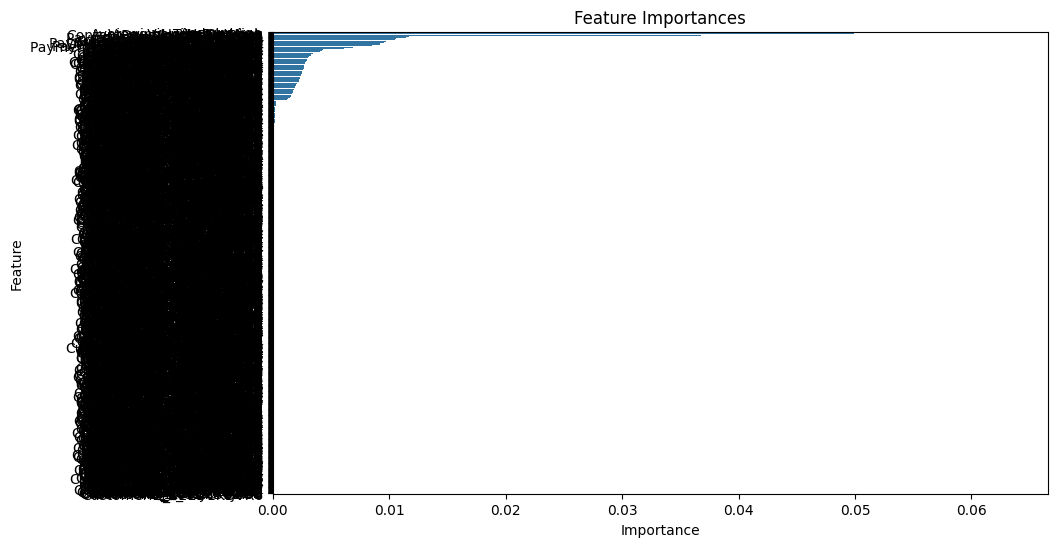

In [23]:

# Assuming `model` is a trained machine learning model (e.g., RandomForestClassifier)
# Example: model = RandomForestClassifier().fit(X_train, y_train)

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

